# wetlabtools
Examples on how to use wetlabtools

In [1]:
import wetlabtools

Loading BokehJS ...

## Plotting: CD data
Let's plot some CD data. Since the ProData data structure is horrible, we first have to process the data. If you provide a path to a csv file with the buffer baseline, it will return the baseline-corrected CD data. Currently only temperature melts are supported!

/Users/goldbach/git/wetlabtools/wetlabtools/plot/CD.py:281: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


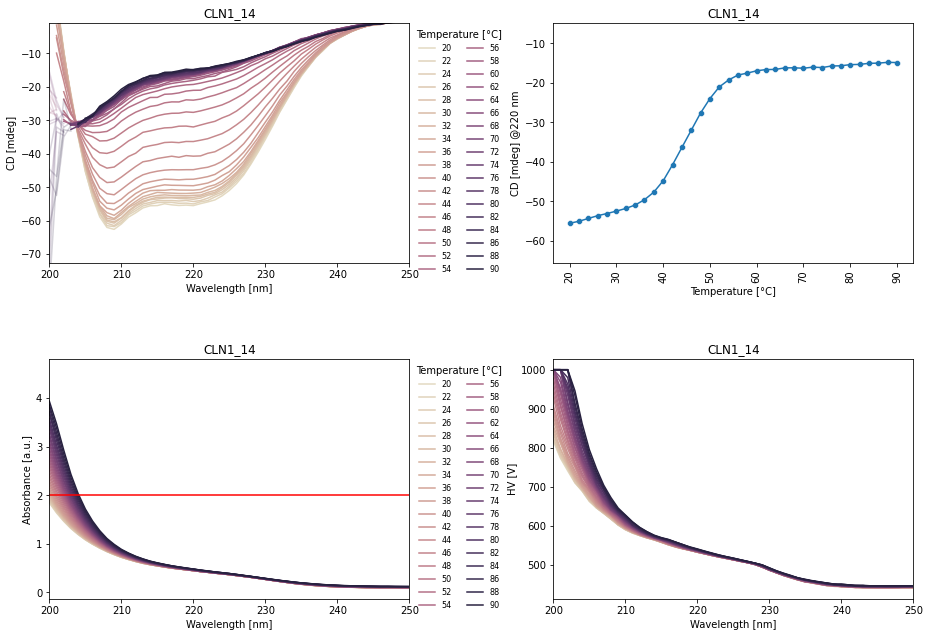

In [2]:
CD_data = 'example_data/CLN1_1400009.csv'
buffer = 'example_data/buffer00008.csv'

# process CD data
data = wetlabtools.plot.load_CD_data(data_csv=CD_data,
                                buffer_csv=buffer)

# now we can plot the data. It will automatically plot all samples
wetlabtools.plot.cd(data=data,
                    zooms=[False],
                    out_path='',
                    cutoff=2.0,
                    mode='fade',
                    min_x=200,
                    max_x=250,
                    save_pdf=False,
                    save_png=False
                   )

## Plotting: SEC-MALS
You can provide a path to the directory containing all csv files that you want to plot. The function will automatically find all csv files and plot the SEC-MALS data. If you wish to save plots, these will be saved to the same location as the input file.

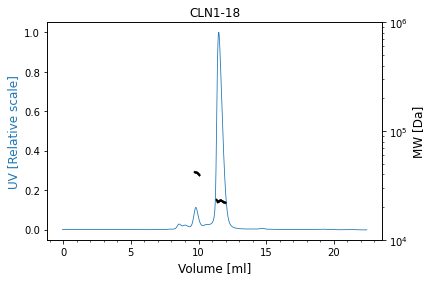

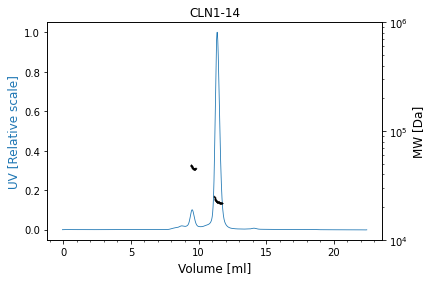

In [3]:
sec_mals = 'example_data/sec_mals'

wetlabtools.plot.secmals(path=sec_mals,
                      flow_rate=0.5,
                      min_x=0,
                      max_x=999,
                      save_pdf=False,
                      save_png=False
                     )

## Plotting: Interactive FPLC plot
You can use the package to plot your SEC or IMAC runs interactively. To do so, export the fplc data from Unicorn (Äkta software) as csv file: open the chromatogram in the evaluation software and click export data in the top toolbar. You can zoom and pan the plot and download the current view as a picture. Click the legend entries if you like to hide data from the plot.

In [4]:
imac_data = '/Volumes/lpdi/goldbach/Akta/20230830_sMEM_His5ml/20230830_sMEM_His5ml_CLN1-13.csv'

wetlabtools.plot.interactive_fplc(imac_data)